In [10]:
import numpy as np
import matplotlib.pyplot as plt

c=0: resp:
 [8.5  7.9  8.1  8.12 8.2 ] (5,)
c=1: resp:
 [8.30254545 8.10509091 8.11272727 8.13309091 8.16654545] (5,)
c=10: resp:
 [8.19069423 8.15976365 8.15480944 8.15533617 8.15939652] (5,)
c=20: resp:
 [8.17827323 8.16218689 8.1592099  8.1591934  8.16113657] (5,)


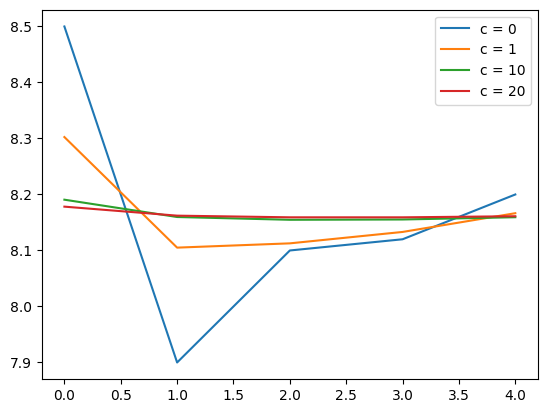

In [16]:
# Punto 1
cs = [0, 1, 10, 20]
y = np.array([8.5, 7.9, 8.1, 8.12, 8.2])
time_series = list(range(len(y)))

plt.figure()

for c in cs:
    I = np.identity(len(y))
    D = np.zeros((len(y)-1, len(y)))

    for i in range(len(y)-1):
        D[i][i] = 1
        D[i][i+1] = -1

    Dt = D.transpose()
    Dt_D = Dt.dot(D)
    c_Dt_D = c*Dt_D 
    I_c_Dt_D = I + c_Dt_D
    inv = np.linalg.inv(I_c_Dt_D)
    inv_y = inv.dot(y)

    # print("x:\n", y)
    # print("I:\n", I, I.shape)
    # print("D:\n", D, D.shape)
    # print("D_t:\n", Dt, Dt.shape)
    # print("D_t*D:\n", Dt_D, Dt_D.shape)
    # print("c*D_t*D:\n", c_Dt_D, c_Dt_D.shape)
    # print("I + c*Dt*D:\n", I_c_Dt_D, I_c_Dt_D.shape)
    # print("inv(I + c*Dt*D):\n", inv, inv.shape)
    print(f"c={c}: resp:\n", inv_y, inv_y.shape)
    
    plt.plot(inv_y, label="c = {}".format(c))

plt.legend()    
plt.show()

In [12]:
# Punto 2

In [13]:
# Punto 3.a
H = np.array([[1, -1.1, (-1.1)**2], [1, 0, 0], [1, 0.9, 0.9**2], [1, 2.2, 2.2**2], [1, 3.05, 3.05**2]])
y = np.array([4, 1.1, -2, -5, -7])
print("H:\n", H, H.shape)
Ht = H.transpose()
print("Ht:\n", Ht, Ht.shape)
HtH = Ht.dot(H)
print("HtH:\n", HtH, HtH.shape)
invHtH = np.linalg.inv(HtH)
resp = invHtH.dot(Ht.dot(y))
print("resp:\n", resp, resp.shape)
# Punto 3.b
eigenvalues, eigenvectors = np.linalg.eig(HtH)
print(min(eigenvalues), max(eigenvalues))
print("Condicionamiento de HtH:", abs(max(eigenvalues)/min(eigenvalues)))


H:
 [[ 1.     -1.1     1.21  ]
 [ 1.      0.      0.    ]
 [ 1.      0.9     0.81  ]
 [ 1.      2.2     4.84  ]
 [ 1.      3.05    9.3025]] (5, 3)
Ht:
 [[ 1.      1.      1.      1.      1.    ]
 [-1.1     0.      0.9     2.2     3.05  ]
 [ 1.21    0.      0.81    4.84    9.3025]] (3, 5)
HtH:
 [[  5.           5.05        16.1625    ]
 [  5.05        16.1625      38.418625  ]
 [ 16.1625      38.418625   112.08230625]] (3, 3)
resp:
 [ 0.78634724 -2.89037457  0.10918208] (3,)
2.086426951473991 127.90292380936529
Condicionamiento de HtH: 61.302373284147876


In [17]:
# Punto 3.c
cs = [0, 1, 10]
I = np.identity(3)

for c in cs:
    HtH_cI = HtH + (c*I)
    invHtH_cI = np.linalg.inv(HtH_cI)
    resp = invHtH_cI.dot(Ht.dot(y))
    print("c = {}, resp:\n".format(c), resp, resp.shape)
    
    # Punto 3.d
    eigenvalues, eigenvectors = np.linalg.eig(HtH_cI)
    print(min(eigenvalues), max(eigenvalues))
    print(f"Condicionamiento de HtH_cI con c={c}:", abs(max(eigenvalues)/min(eigenvalues)))

c = 0, resp:
 [ 8.10093608 -0.20325635  0.08301712] (3,)
2.086426951473991 127.90292380936529
Condicionamiento de HtH_cI con c=0: 61.302373284147876
c = 1, resp:
 [ 5.88707827 -0.38450794  0.46028124] (3,)
3.086426951473992 128.90292380936523
Condicionamiento de HtH_cI con c=1: 41.76444990794445
c = 10, resp:
 [ 1.81068715 -0.05645824  0.86278774] (3,)
12.086426951473989 137.9029238093653
Condicionamiento de HtH_cI con c=10: 11.409734602545004


In [19]:
# Punto 4
H = np.array([[7.9, 8.5], [8.1, 7.9], [8.12, 8.1]])
y = np.array([8.1, 8.12, 8.2])
print("H:\n", H, H.shape)
Ht = H.transpose()
print("Ht:\n", Ht, Ht.shape)
HtH = Ht.dot(H)
print("HtH:\n", HtH, HtH.shape)
invHtH = np.linalg.inv(HtH)
print("invHtH:\n", invHtH, invHtH.shape)
Hty = Ht.dot(y)
resp = invHtH.dot(Hty)
print("resp:\n", resp, resp.shape)

H:
 [[7.9  8.5 ]
 [8.1  7.9 ]
 [8.12 8.1 ]] (3, 2)
Ht:
 [[7.9  8.1  8.12]
 [8.5  7.9  8.1 ]] (2, 3)
HtH:
 [[193.9544 196.912 ]
 [196.912  200.27  ]] (2, 2)
invHtH:
 [[ 2.90617255 -2.8574437 ]
 [-2.8574437   2.81452516]] (2, 2)
resp:
 [0.78964837 0.2193377 ] (2,)


In [20]:
# Punto 5
H = np.array([[0, 5.39], [0.9, -4.1], [2.14, -6], [3.1, 7.2]])
y = np.array([-4.1, -6, 7.2, 4.4])
Ht = H.transpose()
print("Ht:\n", Ht, Ht.shape)
HtH = Ht.dot(H)
invHtH = np.linalg.inv(HtH)
Hty = Ht.dot(y)
resp = invHtH.dot(Hty)
print("resp:\n", resp, resp.shape)

Ht:
 [[ 0.    0.9   2.14  3.1 ]
 [ 5.39 -4.1  -6.    7.2 ]] (2, 4)
resp:
 [ 1.62985922 -0.13803736] (2,)
